# Домашнее задание 2. Оптимальные портфели инвестиций.


Выполнили Пасманик Ирина, Шарибжанова Диана 19ПМИ1



### Импорт библиотек и скачивание данных

In [1]:
!pip install yfinance > /dev/null

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats
import datetime

### **Задание 1**
#### **Efficient frontier.** 

#### Выбрать на рынке набор из 50 акций.  Объясните ваш выбор. 
#### Построить эффективный фронт портфелей инвестиций без ограничений на короткие позиции и  эффективный фронт с запретом коротких позиций. Сравнить эффективные фронты и сделать выводы. При построении эффективных фронтов вычислить портфели с минимальным риском и отметить их на соответствующем эффективном фронте. 
#### Рассмотреть портфель  с равными долями вложения капитала и оценить, как  далек этот портфель от эффективного фронта. Тот же вопрос для индекса рынка.

Возьмем первые по алфавиту 50 акций из индекса FTSE100. (Поскольку в индеске содержатся самые значимые для рынка компании)

In [3]:
FTSE100_list = ['III', 'ADM', 'AAF', 'AAL', 'ANTO', 'AHT', 'ABF', 'AZN', 'AUTO', 'AVV', 'AV', 'BME', 'BA', 'BARC', 'BDEV', 'BKG', 'BP', 'BATS', 'BLND', 'BT', 'BNZL', 'BRBY', 'CNA', 'CCH', 'CPG', 'CTEC', 'CRH', 'CRDA', 'DCC', 'DPH', 'DGE', 'EDV', 'ENT', 'EXPN', 'FCIT', 'FLTR', 'FRAS', 'FRES', 'GLEN', 'GSK', 'HLN', 'HLMA', 'HBR', 'HL', 'HSV', 'HSBA', 'IMB', 'INF', 'IHG', 'ICP', 'IAG', 'ITRK', 'JD', 'KGF', 'LAND', 'LGEN', 'LLOY', 'LSEG', 'MNG', 'MRO', 'MNDI', 'NG', 'NWG', 'NXT', 'OCDO', 'PSON', 'PSH', 'PSN', 'PHNX', 'PRU', 'RKT', 'REL', 'RTO', 'RMV', 'RIO', 'RR', 'RS1', 'SGE', 'SBRY', 'SDR', 'SMT', 'SGRO', 'SVT', 'SHEL', 'SN', 'SMDS', 'SMIN', 'SKG', 'SPX', 'SSE', 'STJ', 'STAN', 'TW', 'TSCO', 'ULVR', 'UTG', 'UU', 'VOD', 'WTB', 'WPP']

In [4]:
# start = datetime.datetime(2017, 1, 1)
# end = datetime.datetime(2017, 12, 31)

# data = pd.DataFrame()

# for i in FTSE100_list:  
#     print(str(FTSE100_list.index(i)) + str(' : ') + i + '.L', sep=',', end=',\n', flush=True)  
#     try:
#         stock = []
#         stock = yf.download(i + '.L',start=start, end=end, progress=False)
#         if len(stock) == 0:
#             None
#         else:
#             stock['Name']=i
#             data = data.append(stock,sort=False)
#     except Exception:
#         None

# data.to_csv('FTSE100_data.csv')

In [5]:
data = pd.read_csv('/content/drive/MyDrive/FOR/FTSE100_data.csv')
index = pd.read_csv('/content/drive/MyDrive/FOR/index.csv')

data = data.drop(columns = ['Low', 'High', 'Open', 'Close'])
index = index.drop(columns = ['Low', 'High', 'Open', 'Close'])

In [6]:
all_tickers = list(set(data['Name'])) # creation of data tickers list
all_tickers.sort()
print(all_tickers)

['AAL', 'ABF', 'ADM', 'AHT', 'ANTO', 'AUTO', 'AV', 'AVV', 'AZN', 'BA', 'BARC', 'BATS', 'BDEV', 'BKG', 'BLND', 'BME', 'BNZL', 'BP', 'BRBY', 'CCH', 'CNA', 'CPG', 'CRDA', 'CRH', 'CTEC', 'DCC', 'DGE', 'DPH', 'ENT', 'EXPN', 'FCIT', 'FLTR', 'FRAS', 'FRES', 'GLEN', 'GSK', 'HL', 'HLMA', 'HSBA', 'HSV', 'IAG', 'ICP', 'IHG', 'III', 'IMB', 'INF', 'ITRK', 'JD', 'KGF', 'LAND', 'LGEN', 'LLOY', 'LSEG', 'MNDI', 'MRO', 'NG', 'NWG', 'NXT', 'OCDO', 'PHNX', 'PRU', 'PSH', 'PSN', 'PSON', 'REL', 'RIO', 'RKT', 'RMV', 'RR', 'RS1', 'RTO', 'SBRY', 'SDR', 'SGE', 'SGRO', 'SHEL', 'SKG', 'SMDS', 'SMIN', 'SMT', 'SN', 'SPX', 'SSE', 'STAN', 'STJ', 'SVT', 'TSCO', 'TW', 'ULVR', 'UTG', 'UU', 'VOD', 'WPP', 'WTB']


In [7]:
tickers = all_tickers[:50]
print(tickers)

['AAL', 'ABF', 'ADM', 'AHT', 'ANTO', 'AUTO', 'AV', 'AVV', 'AZN', 'BA', 'BARC', 'BATS', 'BDEV', 'BKG', 'BLND', 'BME', 'BNZL', 'BP', 'BRBY', 'CCH', 'CNA', 'CPG', 'CRDA', 'CRH', 'CTEC', 'DCC', 'DGE', 'DPH', 'ENT', 'EXPN', 'FCIT', 'FLTR', 'FRAS', 'FRES', 'GLEN', 'GSK', 'HL', 'HLMA', 'HSBA', 'HSV', 'IAG', 'ICP', 'IHG', 'III', 'IMB', 'INF', 'ITRK', 'JD', 'KGF', 'LAND']


In [8]:
adj_close = pd.DataFrame() # adjusted closing price
adj_close = data.drop(columns = ['Volume'])
adj_close = (adj_close.assign(idx=adj_close.groupby('Name').cumcount())
                 .pivot_table(index='Date', columns='Name', 
                              values='Adj Close', aggfunc='sum'))
adj_close.reset_index(level=0, inplace=True)
adj_close = adj_close.loc[:, :tickers[-1]:]

adj_close = adj_close.dropna(axis=1, how='any') # revome missing values

adj_close['FTSE'] = index['Adj Close'] # add the index data

# adj_close

In [9]:
log_returns = pd.DataFrame()
log_returns['Date'] = adj_close['Date']

days = len(log_returns['Date'])
tickers.append('FTSE')
for ticker in tickers:
    for i in range(1, days):
        log_returns.loc[i, ticker] = np.log(adj_close.loc[i, ticker]/adj_close.loc[i-1, ticker])

log_returns = log_returns.drop([0])

# log_returns

In [10]:
means = pd.DataFrame(columns=['mean'], index=tickers)
stds = pd.DataFrame(columns=['std'], index=tickers)

for ticker in tickers:
    mean = np.mean(log_returns[ticker])
    std = np.std(log_returns[ticker])
    means['mean'][ticker] = mean
    stds['std'][ticker] = std

index_mean = means['mean']['FTSE']
index_std = stds['std']['FTSE']

means = means.drop('FTSE')
stds = stds.drop('FTSE')
tickers.pop(-1)
log_returns = log_returns.drop('FTSE', axis=1)

In [11]:
sample_cov = pd.DataFrame(columns = tickers, index = tickers)

count = 0
for ticker_1 in tickers:
  count += 1
  for ticker_2 in tickers:
      summ = 0
      N = log_returns[ticker_2].shape[0] # количество наблюдений
      for i in range(1,N+1):
          summ += (log_returns[ticker_1][i] - float(means.loc[ticker_1])) * (log_returns[ticker_2][i] - float(means.loc[ticker_2]))
      sample_cov[ticker_1][ticker_2] = summ / N

# sample_cov

Изобразим все выбранные акции на графике

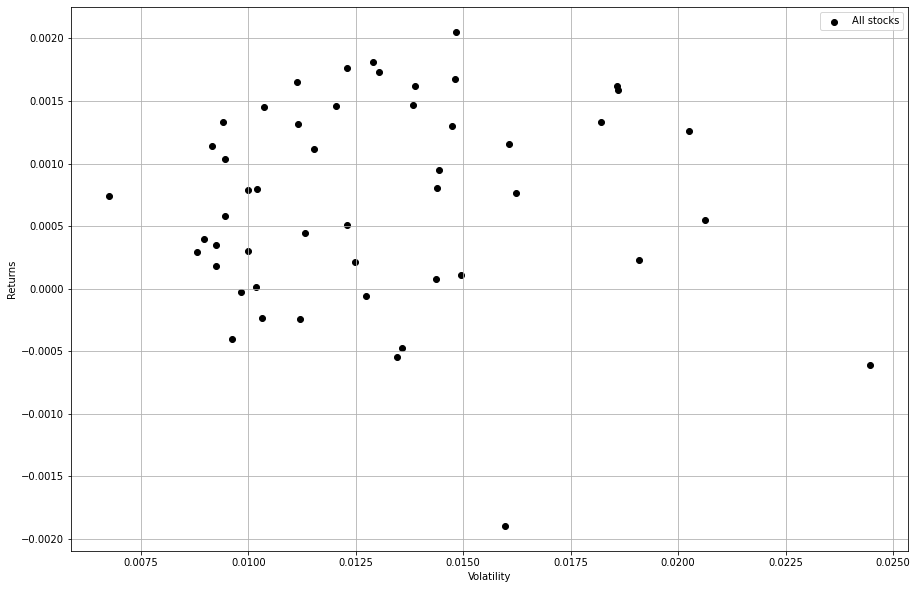

In [12]:
fig, p = plt.subplots(figsize=(15, 10))
fig.suptitle("")
p.scatter(stds, means, marker="o", label='All stoсks', color='black')
p.set_xlabel("Volatility")
p.set_ylabel("Returns")
p.grid()
p.legend()
fig.show()

In [13]:
def portfolio_return(x, means): # доходность портфеля
  return float(np.matmul(x, means.to_numpy()))

def portfolio_volatility(x, cov_matrix): # риск портфеля
  return float(np.matmul(np.matmul(x, cov_matrix.to_numpy()), x.T))

def portfolios_generator(means, cov_matrix, short_sales=False, n_portfolios=10):
    n_stocks = means.shape[0]
    
    portfolio_means = [] # returns per portfolio
    portfolio_std_devs = [] # standard deviations per portfolio
    
    x_range = ()
    if short_sales:
        x_range = (-1, 1)
    else:
        x_range = (0, 1)
        
    for portfolio in range(n_portfolios):
        x = np.random.uniform(x_range[0], x_range[1],n_stocks)
        x = x/sum(x) # normalization
        x = np.array(x)  
        portfolio_means.append(portfolio_return(x, means))
        portfolio_std_devs.append(portfolio_volatility(x, cov_matrix))
          
    return portfolio_std_devs, portfolio_means

Создадим и изобразим несколько случайных портфелей, составленных их выбранных акций для двух случаев: с запретом на короткие продажи (красный) и без него (зеленый).

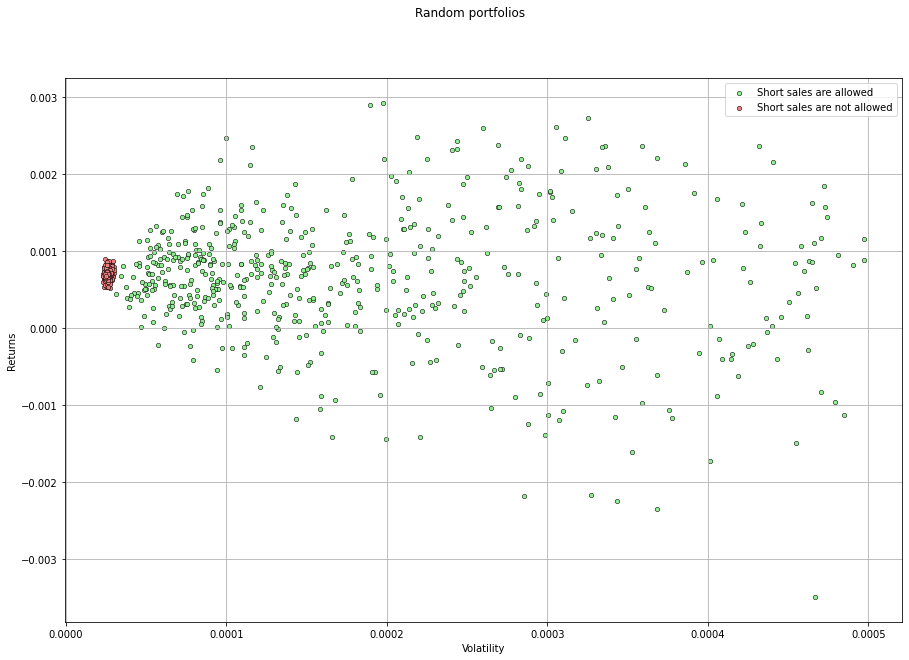

In [14]:
rand_port_std_short, rand_port_means_short = portfolios_generator(means, sample_cov, short_sales=True, n_portfolios=1000)
rand_port_std_no_short, rand_port_means_no_short = portfolios_generator(means, sample_cov, short_sales=False, n_portfolios=500)

idx_list = []
for i in range(len(rand_port_std_short)):
  if ((rand_port_std_short[i] > 0.0005) or (abs(rand_port_means_short[i]) > 0.02)):
    idx_list.append(i)
for i, idx in enumerate(idx_list):
  rand_port_std_short.pop(idx-i)
  rand_port_means_short.pop(idx-i)

fig, p = plt.subplots(figsize=(15, 10))
fig.suptitle("Random portfolios")

# random portfolios plot
p.scatter(rand_port_std_short, rand_port_means_short, marker="o", color='lightgreen',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are allowed")
p.scatter(rand_port_std_no_short, rand_port_means_no_short, marker="o", color='lightcoral',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are not allowed")

p.set_xlabel("Volatility")
p.set_ylabel("Returns")
p.grid()
p.legend()
fig.show()

In [16]:
def optimize_portfolio_volatility(means, cov_matrix, short_sales=True, custom_return=False, target_return=None):
    n_stocks = means.shape[0]
    
    x_initial = np.random.random(n_stocks)  # rand initial value
    x_initial = x_initial/np.sum(x_initial) # normalization
    x_initial = np.array(x_initial)

    constraints = [{'type': 'eq',
                    'fun': lambda x: x.sum() - 1.0
                   }]
    
    # если хотим найти наименьшее значение риска портфеля при заданном уровне доходности
    if custom_return:
        if target_return is None:
            print("Target Return is not set!")
            return 
        else:
            constraints.append({'type': 'eq', 
                                'fun': lambda x: portfolio_return(x, means) - target_return
                               })
            print(f"Looking for a solution for {target_return}")
            
    x_bounds = []
    if short_sales:
        for i in range(n_stocks):
            x_bounds.append((None, None))
    else:
        for i in range(n_stocks):
            x_bounds.append((0, 1))        
  
    result = scipy.optimize.minimize(portfolio_volatility, # функция, которую хотим оптимизировать
                                     x_initial, # начальное решение 
                                     args=(cov_matrix), # дополнительные аргументы целевой функции
                                     method='SLSQP', # метод оптимизации (МНК)
                                     constraints=constraints, # ограничения 
                                     bounds=x_bounds, # ограничения на значения x
                                     options={'maxiter':1000, 'disp': False}
                                    )
    return result.x

In [17]:
# Оптимальный портфель с разрешенными короткими продажами
x_opt_shorts = optimize_portfolio_volatility(means, sample_cov, short_sales=True)
opt_short_return = portfolio_return(x_opt_shorts, means)
opt_short_volatility = portfolio_volatility(x_opt_shorts, sample_cov)
print(f"Pareto optimal Portfolio (short sales are allowed)\n {x_opt_shorts} ")
print(f"\nVolatility: {opt_short_volatility}, Return: {opt_short_return}")

Pareto optimal Portfolio (short sales are allowed)
 [0.03703624 0.01511085 0.02059195 0.00910828 0.00557589 0.03453162
 0.03332073 0.02023751 0.02732717 0.03450075 0.01658647 0.03638638
 0.01057297 0.02677374 0.01284903 0.00849733 0.00256131 0.00139957
 0.02501986 0.01527885 0.01852383 0.03496098 0.00611713 0.02341565
 0.01349461 0.02736118 0.00016228 0.03332358 0.02734197 0.01819954
 0.01396301 0.01238125 0.02929594 0.02835203 0.00362063 0.00318781
 0.01359539 0.02920303 0.0087772  0.03455726 0.01136421 0.03033461
 0.01388268 0.02308675 0.03136011 0.03431357 0.01881491 0.0146629
 0.03049852 0.01858094] 

Volatility: 2.5039366608692723e-05, Return: 0.0006998641865024083


In [18]:
# Оптимальный портфель с запрещенными короткими продажами
x_opt_no_shorts = optimize_portfolio_volatility(means, sample_cov, short_sales=False)
opt_no_short_return = portfolio_return(x_opt_no_shorts, means)
opt_no_short_volatility = portfolio_volatility(x_opt_no_shorts, sample_cov)
print(f"Pareto optimal Portfolio (short sales are not allowed)\n {x_opt_no_shorts} ")
print(f"\nVolatility: {opt_no_short_volatility}, Return: {opt_no_short_return}")

Pareto optimal Portfolio (short sales are not allowed)
 [0.03568677 0.03228728 0.02043325 0.00357111 0.0247274  0.01608404
 0.04162369 0.03197013 0.01437357 0.03429451 0.03362073 0.03223975
 0.02912376 0.02257128 0.002346   0.00700464 0.01218142 0.00415816
 0.02005674 0.00760305 0.0276645  0.04088173 0.02468873 0.01705398
 0.0057152  0.0328255  0.0115785  0.00779338 0.03211768 0.00639131
 0.01950236 0.00670049 0.01742594 0.01538331 0.01376436 0.00898031
 0.02096439 0.0036346  0.02128803 0.02167183 0.0268105  0.03061847
 0.01913879 0.00359565 0.04248459 0.00445442 0.03212208 0.01115171
 0.03325049 0.01438991] 

Volatility: 2.517451604639227e-05, Return: 0.0007079933578925298


Looking for a solution for 0.0006998641865024083
Looking for a solution for 0.0010665459435576963
Looking for a solution for 0.0014332277006129843
Looking for a solution for 0.0017999094576682721
Looking for a solution for 0.00216659121472356
Looking for a solution for 0.002533272971778848
Looking for a solution for 0.002899954728834136
Looking for a solution for 0.003266636485889424
Looking for a solution for 0.003633318242944712
Looking for a solution for 0.004
Looking for a solution for 0.0007079933578925298
Looking for a solution for 0.0008515496514600265
Looking for a solution for 0.0009951059450275233
Looking for a solution for 0.00113866223859502
Looking for a solution for 0.0012822185321625166
Looking for a solution for 0.0014257748257300133
Looking for a solution for 0.00156933111929751
Looking for a solution for 0.0017128874128650067
Looking for a solution for 0.0018564437064325034
Looking for a solution for 0.002


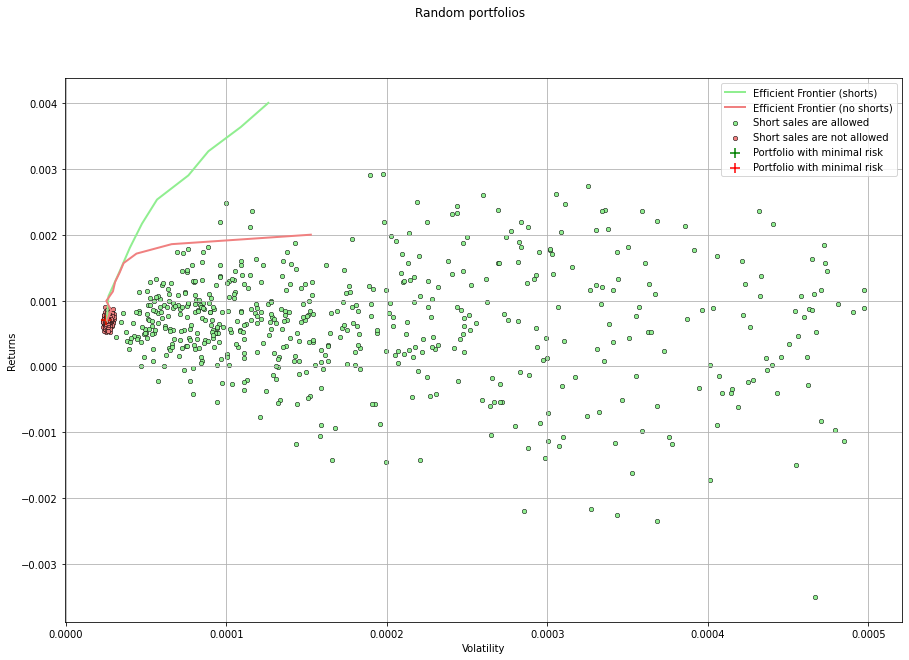

In [19]:
fig, p = plt.subplots(figsize=(15, 10))
fig.suptitle("Random portfolios")

# random portfolios plot
p.scatter(rand_port_std_short, rand_port_means_short, marker="o", color='lightgreen',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are allowed")
p.scatter(rand_port_std_no_short, rand_port_means_no_short, marker="o", color='lightcoral',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are not allowed")

# optimal frontier plot with sorts
target_returns_short = np.linspace(opt_short_return, 0.004, 10)
opt_volatilities_short = []
for target_return in target_returns_short:
    x_opt = optimize_portfolio_volatility(means, sample_cov, short_sales=True, custom_return=True, target_return=target_return)
    opt_volatility = portfolio_volatility(x_opt, sample_cov)
    opt_volatilities_short.append(opt_volatility)

# optimal frontier plot with no sorts
target_returns_no_short = np.linspace(opt_no_short_return, 0.002, 10)
opt_volatilities_no_short = []
for target_return in target_returns_no_short:
    x_opt = optimize_portfolio_volatility(means, sample_cov, short_sales=False, custom_return=True, target_return=target_return)
    opt_volatility = portfolio_volatility(x_opt, sample_cov)
    opt_volatilities_no_short.append(opt_volatility)

p.plot(opt_volatilities_short, target_returns_short, color="lightgreen", linewidth=2, label="Efficient Frontier (shorts)")
p.plot(opt_volatilities_no_short, target_returns_no_short, color="lightcoral", linewidth=2, label="Efficient Frontier (no shorts)")

p.scatter(opt_short_volatility, opt_short_return, color="g", marker="+", s=100, label="Portfolio with minimal risk")
p.scatter(opt_no_short_volatility, opt_no_short_return, color="r", marker="+", s=100, label="Portfolio with minimal risk") 

p.set_xlabel("Volatility")
p.set_ylabel("Returns")
p.grid()
p.legend()
fig.show()   

На графике видно, что эффективный фронт с запрещенными короткими продажами находится ниже, чем эффективным фронт с разрешенными короткими продажами.

То есть при равных рисках доходность на эффективном фронте с разрешенными короткими продажами всегда выше.


In [20]:
# портфель с равными долями
n_stocks = means.shape[0]
x_eq_w = np.ones(n_stocks) # x equally weighted, i. e. equally weighted portfolio 
x_eq_w = x_eq_w/np.sum(x_eq_w) # нормализация
x_eq_w = np.array(x_eq_w)
eq_w_volatility = portfolio_volatility(x_eq_w, sample_cov)
eq_w_return = portfolio_return(x_eq_w, means)

# индекса рынка 
# index_mean
# index_std

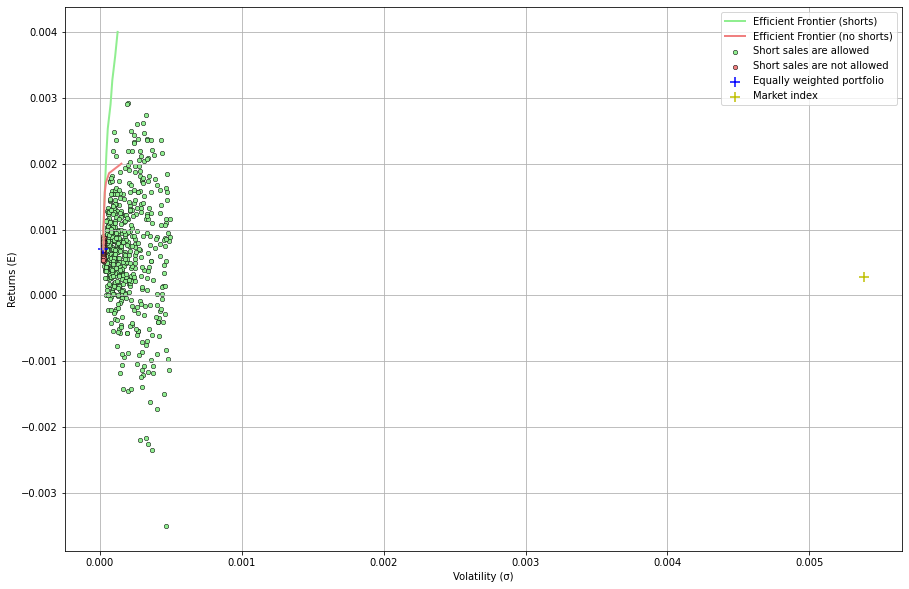

In [21]:
fig, p = plt.subplots(figsize=(15, 10))

# random portfolios plot
p.scatter(rand_port_std_short, rand_port_means_short, marker="o", color='lightgreen',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are allowed")
p.scatter(rand_port_std_no_short, rand_port_means_no_short, marker="o", color='lightcoral',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are not allowed")

# optimal frontier plot
p.plot(opt_volatilities_short, target_returns_short, color="lightgreen", linewidth=2, label="Efficient Frontier (shorts)") 
p.plot(opt_volatilities_no_short, target_returns_no_short, color="lightcoral", linewidth=2, label="Efficient Frontier (no shorts)")

# equally weighted portfolio plot
p.scatter(eq_w_volatility, eq_w_return, color="b", marker="+", s=100, label="Equally weighted portfolio")

# market index plot
p.scatter(index_std, index_mean, color="y", marker="+", s=100, label="Market index")

p.set_xlabel("Volatility (σ)")
p.set_ylabel("Returns (E)")
p.grid()
p.legend()
fig.show()

Портфель с равными долями имеет маленькую доходность и маленький риск. Индекс рынка практически не отличается по доходности, но имеет сильно больший риск.

### **Задание 2**
#### **Portfolio selection problem.**
#### Требуется построить «хорошие» инвестиционные портфели из 10 активов вместо исходных 50 (или даже всех активов рынка).
#### Предложите способ выбрать 10 активов (из отобранных ранее 50) для формирования портфеля. Сравните эффективные фронты всего набора (50 акций)  и выбранного набора активов (10 акций) для двух случаев (короткие продажи разрешены и короткие продажи запрещены)

Рассчитаем коэффициент Шарпа для всех 50 активов и выберем 10 активов с наибольшим его значением.

In [22]:
sample_std_devs = pd.DataFrame(data= pd.DataFrame(np.diag(sample_cov)**0.5,
                                columns = ['std'],
                                index = tickers)) 

In [23]:
risk_free_return = 0.001

sharpe_ratios50 = pd.DataFrame((means - risk_free_return).values * sample_std_devs.values**(-1), 
                               columns=['Sharpe ratio'], 
                               index=means.index)

sharpe_ratios10 = sharpe_ratios50.sort_values(by=['Sharpe ratio'], ascending=False)[0:10]

tickers10 = list(sharpe_ratios10.index)

sample_means10 = means.loc[tickers10]
sample_cov10 = sample_cov.loc[tickers10][tickers10]

In [24]:
# optimal frontier for 10 stocks with short sales
x_opt_short10 = optimize_portfolio_volatility(sample_means10, sample_cov10, short_sales=True)

opt_short_return10 = portfolio_return(x_opt_short10, sample_means10)

target_returns_short10 = np.linspace(opt_short_return10, 0.004, 10)
opt_volatilities_short10 = []

for target_return in target_returns_short10:
    x_opt = optimize_portfolio_volatility(sample_means10, sample_cov10, short_sales=True, custom_return=True, target_return=target_return)
    opt_volatility = portfolio_volatility(x_opt, sample_cov10)
    opt_volatilities_short10.append(opt_volatility)

Looking for a solution for 0.0016192295698720118
Looking for a solution for 0.0018837596176640105
Looking for a solution for 0.002148289665456009
Looking for a solution for 0.0024128197132480076
Looking for a solution for 0.0026773497610400065
Looking for a solution for 0.0029418798088320054
Looking for a solution for 0.003206409856624004
Looking for a solution for 0.0034709399044160023
Looking for a solution for 0.003735469952208001
Looking for a solution for 0.004


In [25]:
# optimal frontier for 10 stocks with no short sales
x_opt_no_short10 = optimize_portfolio_volatility(sample_means10, sample_cov10, short_sales=False)

opt_no_short_return10 = portfolio_return(x_opt_no_short10, sample_means10)

target_returns_no_short10 = np.linspace(opt_no_short_return10, 0.002, 10)
opt_volatilities_no_short10 = []

for target_return in target_returns_no_short10:
    x_opt = optimize_portfolio_volatility(sample_means10, sample_cov10, short_sales=False, custom_return=True, target_return=target_return)
    opt_volatility = portfolio_volatility(x_opt, sample_cov10)
    opt_volatilities_no_short10.append(opt_volatility)

Looking for a solution for 0.0016666118631597127
Looking for a solution for 0.0017036549894753
Looking for a solution for 0.0017406981157908877
Looking for a solution for 0.001777741242106475
Looking for a solution for 0.0018147843684220627
Looking for a solution for 0.00185182749473765
Looking for a solution for 0.0018888706210532377
Looking for a solution for 0.001925913747368825
Looking for a solution for 0.0019629568736844127
Looking for a solution for 0.002


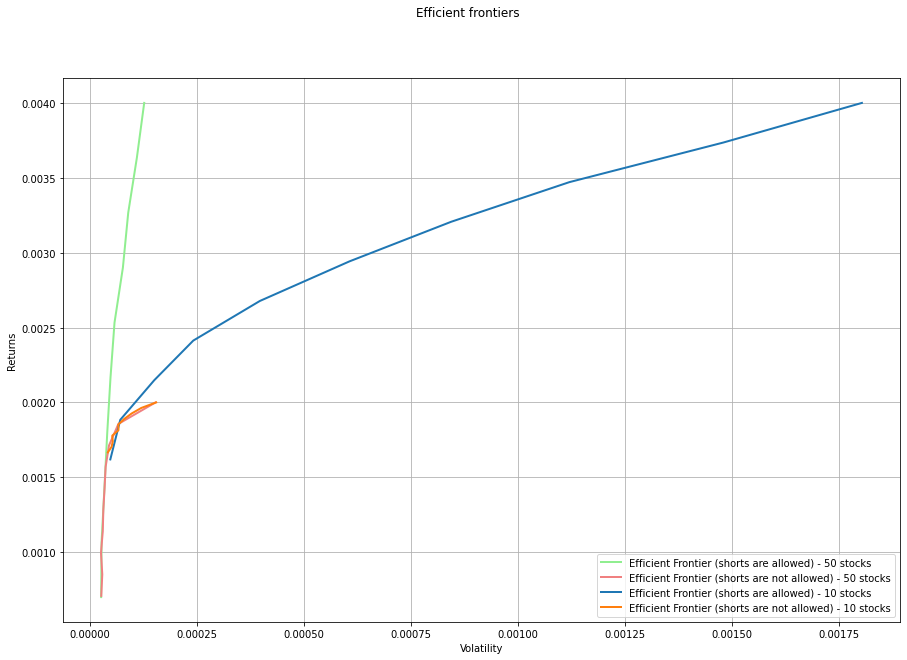

In [26]:
fig, p = plt.subplots(figsize=(15, 10))
fig.suptitle("Efficient frontiers")

# optimal frontier plot
p.plot(opt_volatilities_short, target_returns_short, color="lightgreen", linewidth=2, label="Efficient Frontier (shorts are allowed) - 50 stocks")
p.plot(opt_volatilities_no_short, target_returns_no_short, color="lightcoral", linewidth=2, label="Efficient Frontier (shorts are not allowed) - 50 stocks") 

p.plot(opt_volatilities_short10, target_returns_short10, color="C0", linewidth=2, label="Efficient Frontier (shorts are allowed) - 10 stocks")
p.plot(opt_volatilities_no_short10, target_returns_no_short10, color="C1", linewidth=2, label="Efficient Frontier (shorts are not allowed) - 10 stocks") 

p.set_xlabel("Volatility")
p.set_ylabel("Returns")
p.grid()
p.legend()
fig.show()

Заметно, что для случая с разрешенными короткими продажами при одинаковых доходностях у портфеля из 50 активов риск насмного меньше, чем у портфеля из 10 активов.
А эффективные фронты у портфелей с запрещенными короткими продажами практически совпадают.

### **Задание 3**
#### **Risk aversion.**
#### Оцените свое отношение к риску и постройте свой личный оптимальный портфель инвестиций из выбранных 50 активов.  Дайте характеристику портфеля по составу и долям активов. 
#### Оцените VaR доходностей портфеля. Рассмотрите два случая (короткие продажи разрешены, короткие продажи запрещены).
 

In [27]:
def func(X, returns, alpha, cov_matr):
    return - np.dot(returns, X) + alpha * portfolio_volatility(X, cov_matr)
    
def get_portfolio_with_min_volat(func, returns, cov, alpha, bounds, tick_num):
    X = np.ones(tick_num)
    X = X/X.sum()
    bounds = bounds*tick_num
    
    return scipy.optimize.minimize(func, X,
                    args=(returns, alpha, cov), method='SLSQP',
                    bounds=bounds).x

def risk_aversion(shorts, alpha):
    tick_num = len(tickers) 
    E = means['mean'].values 
    returns = log_returns
    returns = returns.drop("Date", 1)
    bounds = ((-1, 1),) if shorts else ((0, 1),)
    
    portfolio_weights = get_portfolio_with_min_volat(func, E, sample_cov, alpha, bounds, tick_num)
    min_std = portfolio_volatility(portfolio_weights, sample_cov)
    min_E = np.dot(portfolio_weights, E)
    losses = - np.dot(returns, portfolio_weights)
    return min_std, min_E, losses, portfolio_weights

Если короткие продажи разрешены:
$$ \begin{cases} E(x) - \alpha\sigma(x) \rightarrow  max \\ \sum x_i = 1 \end{cases} $$

Рассмотрим несколько случаев для разных α:

In [28]:
std1, E1, losses1, X1 = risk_aversion(shorts=True, alpha=1)
std2, E2, losses2, X2 = risk_aversion(shorts=True, alpha=2)
std3, E3, losses3, X3 = risk_aversion(shorts=True, alpha=3)
std4, E4, losses4, X4 = risk_aversion(shorts=True, alpha=4)
std5, E5, losses5, X5 = risk_aversion(shorts=True, alpha=5)
# std6, E6, losses6, X6 = risk_aversion(shorts=True, alpha=6)
# std7, E7, losses7, X7 = risk_aversion(shorts=True, alpha=7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


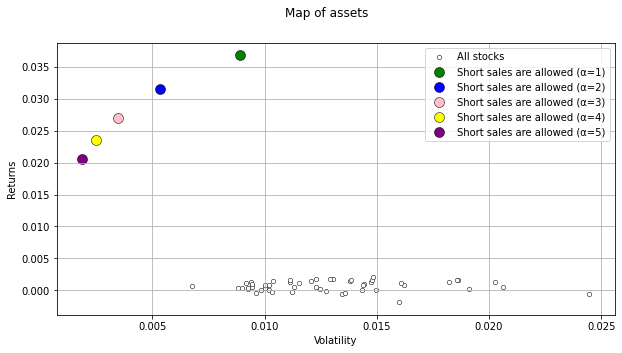

In [29]:
fig, p = plt.subplots(figsize=(10, 5))
fig.suptitle("Map of assets")

p.scatter(sample_std_devs['std'], means['mean'], marker="o", 
           color='white', edgecolors= 'black', linewidth=0.5, s=20, label='All stocks')
p.scatter(std1, E1, marker="o", color='green',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=1)")
p.scatter(std2, E2, marker="o", color='blue',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=2)")
p.scatter(std3, E3, marker="o", color='pink',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=3)")
p.scatter(std4, E4, marker="o", color='yellow',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=4)")
p.scatter(std5, E5, marker="o", color='purple',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=5)")

p.set_xlabel("Volatility")
p.set_ylabel("Returns")
p.grid()
p.legend()
fig.show()

Как видно по графику, портфель с отношением к риску α=5 имеет самый низкий показатель стандартного отклонения.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


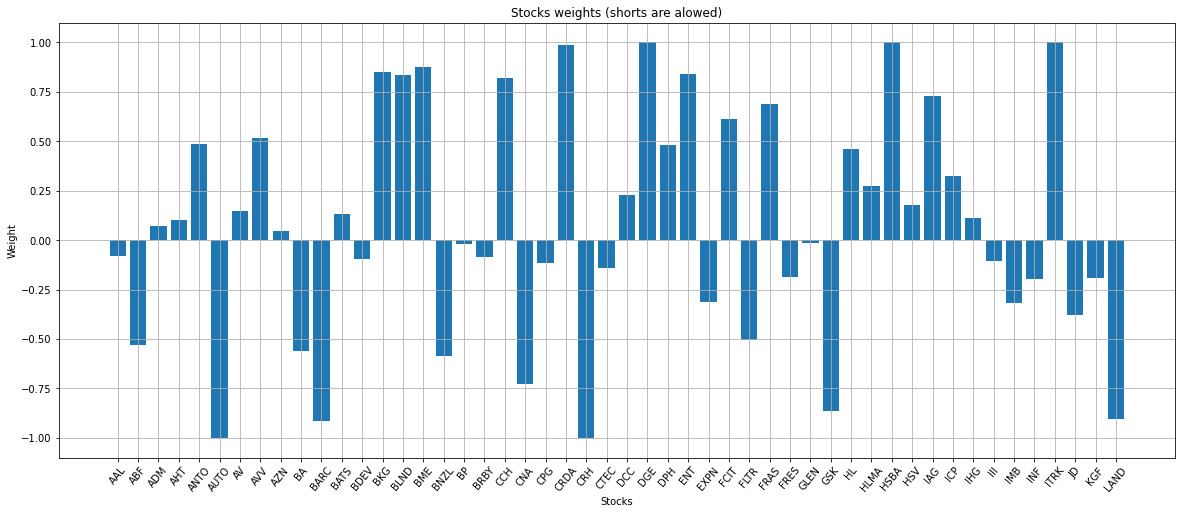

In [30]:
min_std, min_E, losses, portfolio_weights = risk_aversion(shorts=True, alpha=5)

weights_data = pd.DataFrame(index = tickers, columns = ['weight'])
weights_data['weight'] = portfolio_weights

plt.figure(figsize = (20,8))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.bar(x, height = weights_data['weight'])
plt.xticks(x, x_values, rotation='50')
plt.title("Stocks weights (shorts are alowed)")
plt.grid()

Наибольшие веса имеют компании

DGE(Diageo) - алкогольная продукция,

HSBA(HSBC Holdings) - банк,

ITRK(Intertec Group) - оборудование защитных систем,

CRDA(Croda International) - химическое производство.

Никаких явных закономерносетей распределения весов не прослеживается.

In [31]:
сonfidence_levels = [0.9, 0.95, 0.99]

print('VaR для портфеля с отношением к риску α=5 без ограничений на короткие позиции:')

for level in сonfidence_levels:
  tmp = np.quantile(losses, level)
  print(f'Потери не превысят {tmp} с уверенностью {level}')

VaR для портфеля с отношением к риску α=5 без ограничений на короткие позиции:
Потери не превысят 0.0329037989139616 с уверенностью 0.9
Потери не превысят 0.050790377591932154 с уверенностью 0.95
Потери не превысят 0.07813509794837581 с уверенностью 0.99


Если короткие продажи запрещены: 
$$ \begin{cases}  E(x) - \alpha\sigma(x) \rightarrow  max \\ \sum x_i = 1 \\ x_i > 0 \quad \forall i\end{cases} $$

In [32]:
std1, E1, losses1, X1 = risk_aversion(shorts=False, alpha=1)
std2, E2, losses2, X2 = risk_aversion(shorts=False, alpha=2)
std3, E3, losses3, X3 = risk_aversion(shorts=False, alpha=3)
std4, E4, losses4, X4 = risk_aversion(shorts=False, alpha=4)
std5, E5, losses5, X5 = risk_aversion(shorts=False, alpha=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


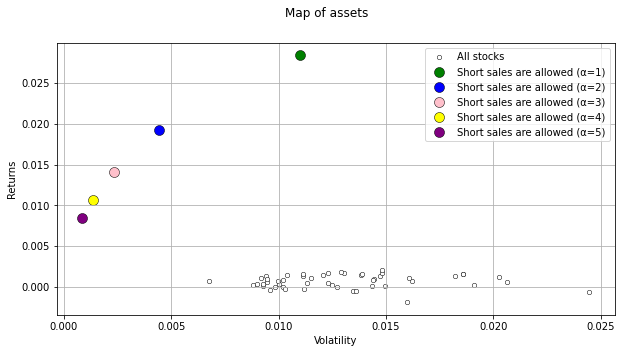

In [33]:
fig, p = plt.subplots(figsize=(10, 5))
fig.suptitle("Map of assets")

p.scatter(sample_std_devs['std'], means['mean'], marker="o", 
           color='white', edgecolors= 'black', linewidth=0.5, s=20, label='All stocks')
p.scatter(std1, E1, marker="o", color='green',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=1)")
p.scatter(std2, E2, marker="o", color='blue',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=2)")
p.scatter(std3, E3, marker="o", color='pink',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=3)")
p.scatter(std4, E4, marker="o", color='yellow',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=4)")
p.scatter(std5, E5, marker="o", color='purple',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=5)")

p.set_xlabel("Volatility")
p.set_ylabel("Returns")
p.grid()
p.legend()
fig.show()

Самое низкое стандартное отклонение имеет портфель, построенный с отношением к риску α=5.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


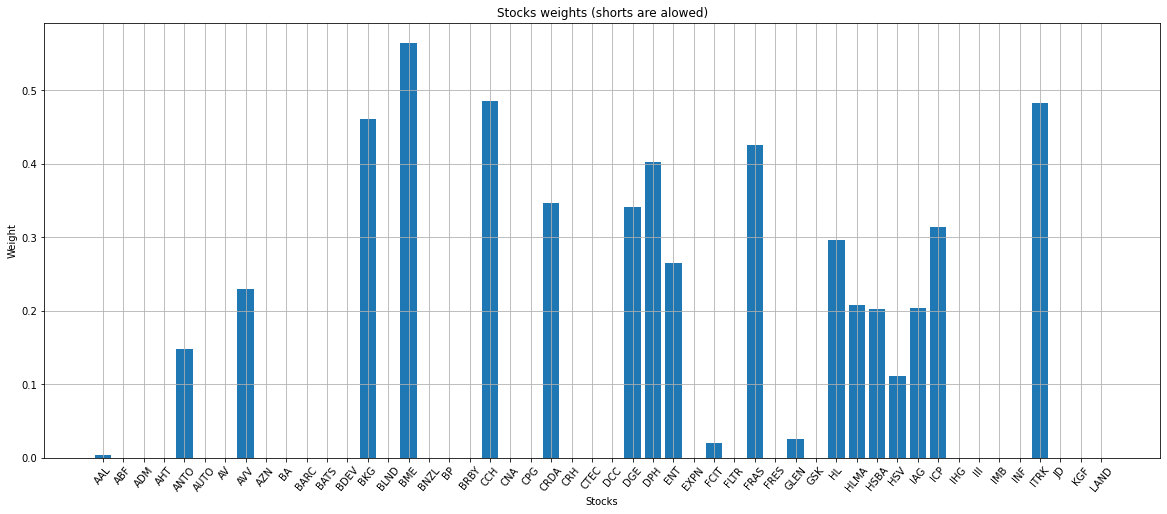

In [34]:
min_std, min_E, losses, portfolio_weights = risk_aversion(shorts=False, alpha=5)

weights_data = pd.DataFrame(index = tickers, columns = ['weight'])
weights_data['weight'] = portfolio_weights

plt.figure(figsize = (20,8))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.bar(x, height = weights_data['weight'])
plt.xticks(x, x_values, rotation='50')
plt.title("Stocks weights (shorts are alowed)")
plt.grid()

Наибольшие веса имеют компании

BME(B&M European Value Retail S.A.) - сеть магазинов,

ITRK(Intertec Group) - оборудование защитных систем,

CCH(Coca Cola Helleni) - производитель напитков,

BKG(The Berkeley Group Holdings) - строительная компания

FRAS(Frasers Group) - группа розничной торговли.

Здесь также не отслеживается никакой зависимости между компаниями.

In [35]:
сonfidence_levels = [0.9, 0.95, 0.99]
print('VaR для портфеля с отношением к риску α=5 с ограничением на короткие позиции:')
for level in сonfidence_levels:
  tmp = np.quantile(losses, level)
  print(f'Потери не превысят {tmp} с уверенностью {level}')

VaR для портфеля с отношением к риску α=5 с ограничением на короткие позиции:
Потери не превысят 0.02983188725933509 с уверенностью 0.9
Потери не превысят 0.03861837576249748 с уверенностью 0.95
Потери не превысят 0.057680209124591195 с уверенностью 0.99


### **Задание 4**
#### **Risk aversion  and Portfolio selection.**
#### Используя выбранное  в п.3 отношение к риску постройте оптимальный портфель из 10 активов (вместо 50, см. п.2).
#### Дайте характеристику этого портфеля по составу активов и долям инвестиций.
#### Сравните с портфелем п.3. Оцените VaR доходностей портфеля. Рассмотрите два случая (короткие продажи разрешены, короткие продажи запрещены).
#### Можно ли ваш портфель из 10 активов улучшить, оставаясь в рамках 10 активов из выбранных ранее 50 активов?


In [35]:
# Портфель из 10 активов
print(tickers10)

log_returns10 = log_returns[tickers10]
# print(log_returns10)

means10 = means.loc[tickers10]
std10 = sample_std_devs.loc[tickers10]
cov10 = sample_cov.loc[tickers10][tickers10]
# print(means10)
# print(cov10)
# print(std10)

['ICP', 'DPH', 'BME', 'ITRK', 'BKG', 'IAG', 'ENT', 'HLMA', 'HL', 'CRDA']


In [36]:
def risk_aversion_for10(shorts, alpha):
    tick_num = len(tickers10) 
    E = means10['mean'].values 
    returns = log_returns10
    bounds = ((-1, 1),) if shorts else ((0, 1),)
    
    portfolio_weights = get_portfolio_with_min_volat(func, E, cov10, alpha, bounds, tick_num)
    min_std = portfolio_volatility(portfolio_weights, cov10)
    min_E = np.dot(portfolio_weights, E)
    losses = - np.dot(returns, portfolio_weights)
    return min_std, min_E, losses, portfolio_weights

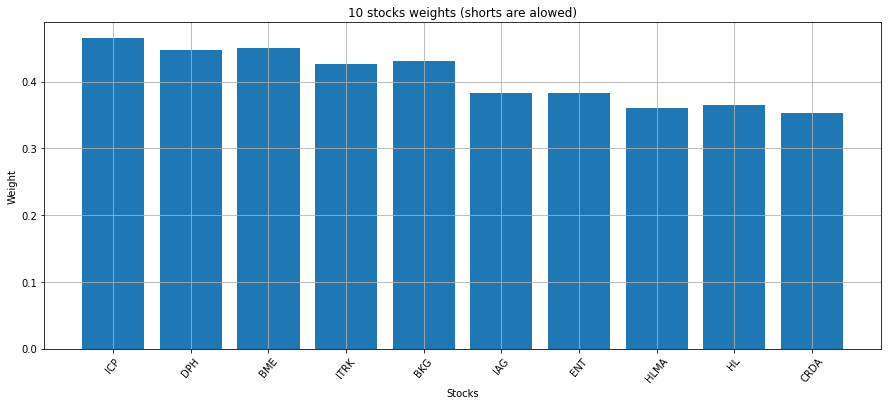

In [37]:
std_short_1, E_short_1, loss_short_1, weights_short_1 = risk_aversion_for10(shorts=True, alpha=5)

weights_data = pd.DataFrame(index = tickers10, columns = ['weight'])
weights_data['weight'] = weights_short_1

plt.figure(figsize = (15,6))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.bar(x, height = weights_data['weight'])
plt.xticks(x, x_values, rotation='50')
plt.title("10 stocks weights (shorts are alowed)")
plt.grid()

Все компании имеют практически одинаковый вес в портфеле.

In [38]:
сonfidence_levels = [0.9, 0.95, 0.99]
print('VaR для портфеля с отношением к риску α=5 без ограничения на короткие позиции:')
for level in сonfidence_levels:
  tmp = np.quantile(loss_short_1, level)
  print(f'Потери не превысят {tmp} с уверенностью {level}')

VaR для портфеля с отношением к риску α=5 без ограничения на короткие позиции:
Потери не превысят 0.02468747230708875 с уверенностью 0.9
Потери не превысят 0.034259588037378774 с уверенностью 0.95
Потери не превысят 0.05158716281502 с уверенностью 0.99


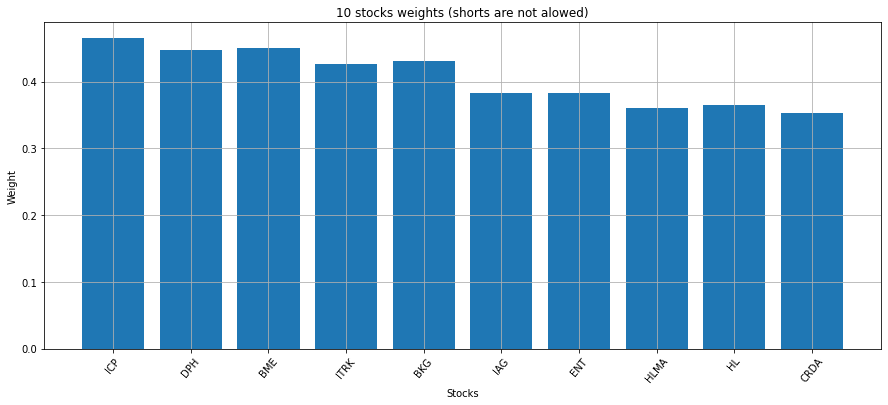

In [39]:
std_short_2, E_short_2, loss_short_2, weights_short_2 = risk_aversion_for10(shorts=False, alpha=5)

weights_data = pd.DataFrame(index = tickers10, columns = ['weight'])
weights_data['weight'] = weights_short_2

plt.figure(figsize = (15,6))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.bar(x, height = weights_data['weight'])
plt.xticks(x, x_values, rotation='50')
plt.title("10 stocks weights (shorts are not alowed)")
plt.grid()

In [40]:
сonfidence_levels = [0.9, 0.95, 0.99]
print('VaR для портфеля с отношением к риску α=5 с ограничением на короткие позиции:')
for level in сonfidence_levels:
  tmp = np.quantile(loss_short_2, level)
  print(f'Потери не превысят {tmp} с уверенностью {level}')

VaR для портфеля с отношением к риску α=5 с ограничением на короткие позиции:
Потери не превысят 0.02468747230708875 с уверенностью 0.9
Потери не превысят 0.034259588037378774 с уверенностью 0.95
Потери не превысят 0.05158716281502 с уверенностью 0.99


### **Задание 5**
#### **Markowitz-Tobin model.**
#### Рассмотрите набор активов, отобранных в п.2 (10 активов).
#### Выберите безрисковый актив (можно виртуальный). Постройте рыночный (оптимальный)  портфель.
#### Сделайте анализ долей активов рыночного портфеля. Оцените VaR доходностей портфеля. Рассмотрите два случая (короткие продажи разрешены, короткие продажи запрещены.)

In [41]:
risk_free_mean = 0.001 # виртуальный ьезрисковый актив

In [42]:
def func(X, returns, risk_free_mean, cov_matr):
    return float(-(X.dot(returns) - risk_free_mean) / np.sqrt(np.dot(np.dot(X, cov_matr), X.T)))
    
def get_portfolio_sharp_ratio(obj_func, returns, cov_matr, risk_free_mean, bounds, tick_num):
    X = np.ones(tick_num)
    X = X/X.sum()
    bounds = bounds*tick_num
    
    constraints = []
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    
    return scipy.optimize.minimize(obj_func, X,
                                   args=(returns, risk_free_mean, cov_matr), method='SLSQP', #МНК
                                   constraints=constraints,
                                   bounds=bounds).x

def sharp_optimal_portfolio(shorts, risk_free_mean):
    tick_num = len(tickers10) 
    E = means10['mean'].values 
    returns = log_returns10
    bounds = ((-1, 1),) if shorts else ((0, 1),)
    
    portfolio_weights = get_portfolio_sharp_ratio(func, E, sample_cov10, risk_free_mean, bounds, tick_num)
    
    min_std = portfolio_volatility(portfolio_weights, sample_cov10)
    min_E = np.dot(portfolio_weights, E)
    losses = - np.dot(returns, portfolio_weights)
    return min_std, min_E, losses, portfolio_weights

Без ограничения на короткие позиции:
$$ \begin{cases} \frac{E(x) - E_{free}}{\sigma(x)} \rightarrow  max \\ \sum x_i = 1 \end{cases} $$

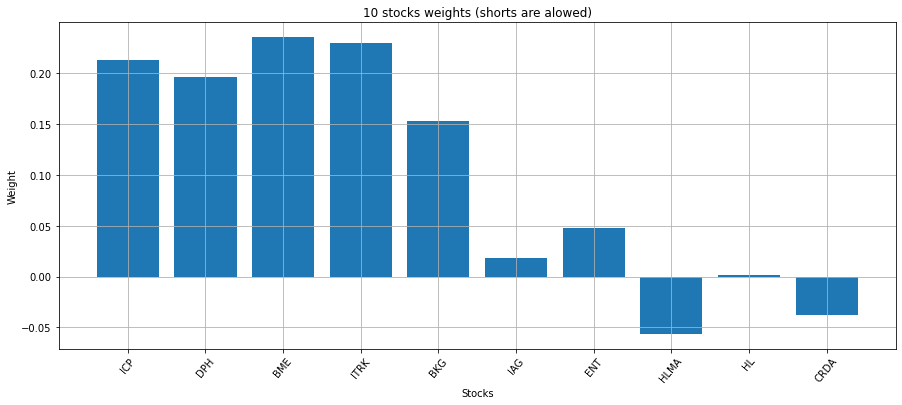

In [44]:
std_short, E_short, loss_short, weights_short = sharp_optimal_portfolio(shorts=True, risk_free_mean=risk_free_mean)

weights_data = pd.DataFrame(index = tickers10, columns = ['weight'])
weights_data['weight'] = weights_short

plt.figure(figsize = (15,6))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.bar(x, height = weights_data['weight'])
plt.xticks(x, x_values, rotation='50')
plt.title("10 stocks weights (shorts are alowed)")
plt.grid()

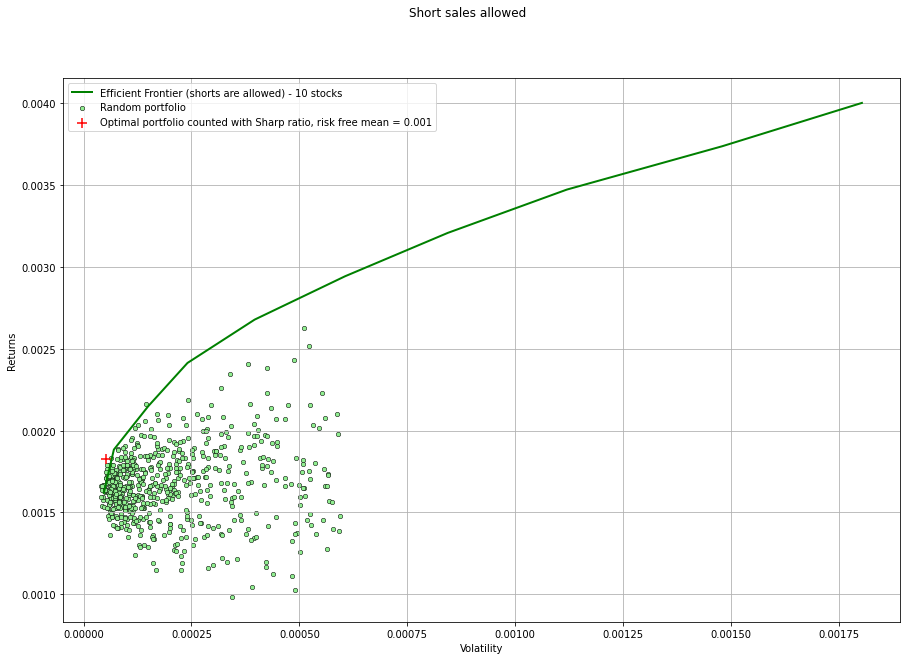

In [45]:
fig, p = plt.subplots(figsize=(15, 10))
fig.suptitle("Short sales allowed")

# random portfolios plot
random_portfolios_short_std_devs, random_portfolios_short_means = portfolios_generator(sample_means10, sample_cov10, short_sales=True, n_portfolios=1000)

indices = [ind for ind in range(len(random_portfolios_short_std_devs)) if random_portfolios_short_std_devs[ind] < 0.0006]
indices = [ind for ind in indices if random_portfolios_short_means[ind] < 0.01]
random_portfolios_short_std_devs = [random_portfolios_short_std_devs[i] for i in indices]
random_portfolios_short_means = [random_portfolios_short_means[i] for i in indices]

p.scatter(random_portfolios_short_std_devs, random_portfolios_short_means, marker="o", color='lightgreen',
           edgecolors= 'black', linewidth=0.5, s=20, label="Random portfolio")

# optimal frontier 
p.plot(opt_volatilities_short10, target_returns_short10, color="green", linewidth=2, label="Efficient Frontier (shorts are allowed) - 10 stocks")

# optimal portfolio counted with sharp ratio 
p.scatter(std_short, E_short, color="red", marker="+", s=100, label="Optimal portfolio counted with Sharp ratio, risk free mean = 0.001")    
       
p.set_xlabel("Volatility")
p.set_ylabel("Returns")
p.grid()
p.legend()
fig.show()

In [46]:
сonfidence_levels = [0.9, 0.95, 0.99]
print('VaR для портфеля с отношением к риску α=5 с ограничением на короткие позиции:')
for level in сonfidence_levels:
  tmp = np.quantile(loss_short, level)
  print(f'Потери не превысят {tmp} с уверенностью {level}')

VaR для портфеля с отношением к риску α=5 с ограничением на короткие позиции:
Потери не превысят 0.0074557133385743015 с уверенностью 0.9
Потери не превысят 0.009481516376262964 с уверенностью 0.95
Потери не превысят 0.014100655979913819 с уверенностью 0.99


С ограничением на короткие позиции:
$$ \begin{cases} \frac{E(x) - E_{free}}{\sigma(x)} \rightarrow  max \\ \sum x_i = 1  \\ x_i > 0 \quad \forall x_i\end{cases} $$

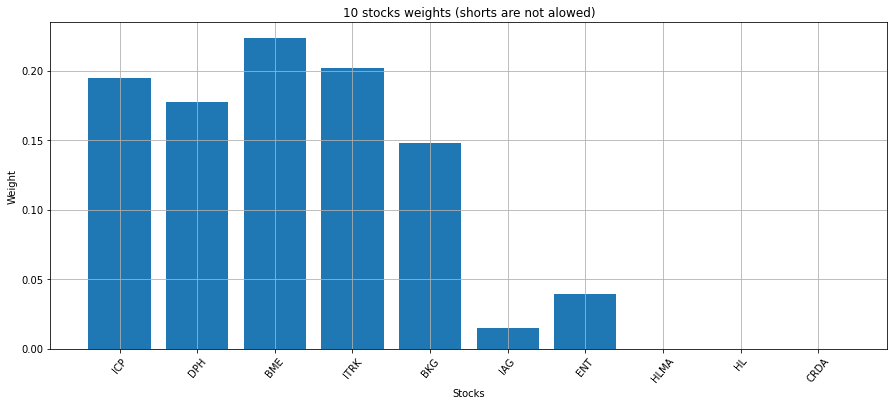

In [47]:
std_short, E_short, loss_short, weights_short = sharp_optimal_portfolio(shorts=False, risk_free_mean=risk_free_mean)

weights_data = pd.DataFrame(index = tickers10, columns = ['weight'])
weights_data['weight'] = weights_short

plt.figure(figsize = (15,6))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.bar(x, height = weights_data['weight'])
plt.xticks(x, x_values, rotation='50')
plt.title("10 stocks weights (shorts are not alowed)")
plt.grid()

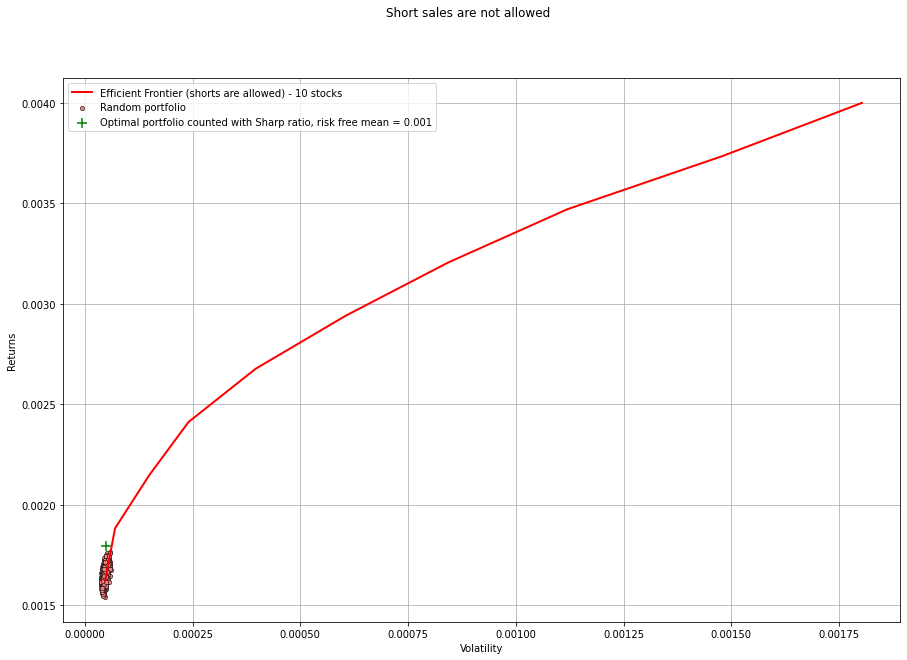

In [48]:
fig, p = plt.subplots(figsize=(15, 10))
fig.suptitle("Short sales are not allowed")

# random portfolios plot
random_portfolios_short_std_devs, random_portfolios_short_means = portfolios_generator(sample_means10, sample_cov10, short_sales=False, n_portfolios=1000)

indices = [ind for ind in range(len(random_portfolios_short_std_devs)) if random_portfolios_short_std_devs[ind] < 0.0006]
indices = [ind for ind in indices if random_portfolios_short_means[ind] < 0.01]
random_portfolios_short_std_devs = [random_portfolios_short_std_devs[i] for i in indices]
random_portfolios_short_means = [random_portfolios_short_means[i] for i in indices]

p.scatter(random_portfolios_short_std_devs, random_portfolios_short_means, marker="o", color='lightcoral',
           edgecolors= 'black', linewidth=0.5, s=20, label="Random portfolio")

# optimal frontier 
p.plot(opt_volatilities_short10, target_returns_short10, color="red", linewidth=2, label="Efficient Frontier (shorts are allowed) - 10 stocks")

# optimal portfolio counted with sharp ratio 
p.scatter(std_short, E_short, color="green", marker="+", s=100, label="Optimal portfolio counted with Sharp ratio, risk free mean = 0.001")    
       
p.set_xlabel("Volatility")
p.set_ylabel("Returns")
p.grid()
p.legend()
fig.show()

In [49]:
сonfidence_levels = [0.9, 0.95, 0.99]
print('VaR для портфеля с отношением к риску α=5 с ограничением на короткие позиции:')
for level in сonfidence_levels:
  tmp = np.quantile(loss_short, level)
  print(f'Потери не превысят {tmp} с уверенностью {level}')

VaR для портфеля с отношением к риску α=5 с ограничением на короткие позиции:
Потери не превысят 0.007326146521240463 с уверенностью 0.9
Потери не превысят 0.00899116717404723 с уверенностью 0.95
Потери не превысят 0.012990003079889852 с уверенностью 0.99
